## importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer , IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error
# from sklearn.base import BaseEstimator, TransformerMixin


## Loading datasets and preprocessing

In [3]:
store_dataset = pd.read_csv("store.csv")
train_dataset = pd.read_csv("train.csv")
new_dataset = pd.merge(train_dataset , store_dataset , how = "inner" , on = "Store_id")
# new_date_time = datetime.strptime(new_dataset.iloc[0]["Date"] , "%m/%d/%Y")
# print(new_date_time)
new_dataset["Date"]  = new_dataset["Date"].apply(lambda x : datetime.strptime(x , "%m/%d/%Y"))

# new_dataset.iloc[0]["Date"]
# new_dataset.sort_values
# new_dataset = sorted(new_dataset , key = lambda x : x["Date"]

## Preprocessing

In [4]:
new_dataset = new_dataset.sort_values(by ="Date")
# new_dataset["DistanceToRivalStore"].fillna(new_dataset["DistanceToRivalStore"].median() , inplace=True)
# new_dataset.fillna(0 , inplace=True)
# new_dataset.iloc[0][""]
new_dataset["Year"] = new_dataset["Date"].apply(lambda x : int(x.year))
new_dataset["Month"] = new_dataset["Date"].apply(lambda x : int(x.month))
new_dataset["Day"] = new_dataset["Date"].apply(lambda x : int(x.day))
new_dataset["Weekofyear"] = new_dataset["Date"].apply(lambda x : int(x.weekofyear))
new_dataset.drop(columns=["Date" , "NumberOfCustomers" ] , inplace=True)
y = new_dataset["Sales"]
new_dataset.drop(columns=["Sales" , "Store_id"], inplace=True )
X = new_dataset
cols = X.columns
# cols
X.isna().sum()
# new_dataset.iloc[0]["Date"].weekofyear

DayOfWeek                       0
Is_Open                         0
BOGO                            0
Holiday                         0
RetailType                      0
Stock variety                   0
DistanceToRivalStore         2642
RivalOpeningMonth          323348
RivalEntryYear             323348
ContinuousBogo                  0
ContinuousBogoSinceWeek    508031
ContinuousBogoSinceYear    508031
ContinuousBogoMonths       508031
Year                            0
Month                           0
Day                             0
Weekofyear                      0
dtype: int64

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , shuffle=False , random_state=None , train_size=0.7)
numerical_cols = ['DistanceToRivalStore']
# categorical_cols = [col for col in X.columns if col!= "DistanceToRivalStore"]
categorical_cols = ['RetailType' , 'Stock variety' , 'RivalOpeningMonth'  , 'RivalEntryYear' , 'ContinuousBogoSinceWeek' , 'ContinuousBogoSinceYear' , 'ContinuousBogoMonths' ]

In [6]:


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
] )

categorical_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=DecisionTreeClassifier(max_depth=5), max_iter=10, random_state=0)),
    # ('encoder' , CustomLabelEncode())
])
preprocessor = ColumnTransformer([('cat', categorical_pipeline, categorical_cols) , ('num', numerical_pipeline, numerical_cols)
                   
] , remainder='passthrough')

# def cat_impute(X , cols = categorical_cols):
#     imputer = SimpleImputer(strategy="most_frequent")
#     for col in cols:
#         X[col] = imputer.fit_transform(X[col].reahape(1, -1))
#     return pd.DataFrame(data=preprocessor.fit_transform(X) , columns=X.columns)
    
# def numeric_impute(X , cols = numerical_cols):
#     imputer = SimpleImputer(strategy="mean")
#     for col in cols:
#         X[col] = imputer.fit_transform(X[col].reahape(1, -1))
#     return pd.DataFrame(data=preprocessor.fit_transform(X) , columns=X.columns)
# def scaler(X , cols = numerical_cols):
#     scaler = StandardScaler()
#     for col in cols:
#         X[col] = scaler.fit_transform(X[col].reahape(1, -1))
#     return pd.DataFrame(data=preprocessor.fit_transform(X) , columns=X.columns)
# def encoding(X , cols =["RetailType" , "Stock variety"]):
#     enc= LabelEncoder()
#     for col in cols:
#         X[col] = enc.fit_transform(X[col].reahape(1, -1))
#     return pd.DataFrame(data=preprocessor.fit_transform(X) , columns=X.columns)
# def final_transform(X):
#     X  = cat_impute(X)
#     X = encoding(X)
#     X = numeric_impute(X)
#     X = scaler(X)
#     return pd.DataFrame(data=preprocessor.fit_transform(X) , columns=X.columns)

# X_test = final_transform(X_test) 

X_test


,DayOfWeek,Is_Open,BOGO,Holiday,RetailType,Stock variety,DistanceToRivalStore,RivalOpeningMonth,RivalEntryYear,ContinuousBogo,ContinuousBogoSinceWeek,ContinuousBogoSinceYear,ContinuousBogoMonths,Year,Month,Day,Weekofyear
422057,7,0,0,0,a,a,4160.0,NaN,NaN,0,NaN,NaN,NaN,2014,10,19,42
200555,7,0,0,0,a,a,2170.0,11.0,2008.0,0,NaN,NaN,NaN,2014,10,19,42
963572,7,0,0,0,d,c,3230.0,11.0,2011.0,0,NaN,NaN,NaN,2014,10,19,42
217327,7,0,0,0,a,a,1110.0,5.0,2009.0,0,NaN,NaN,NaN,2014,10,19,42
536701,7,0,0,0,a,c,360.0,NaN,NaN,1,18.0,2013.0,"Feb,May,Aug,Nov",2014,10,19,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557530,5,1,1,0,d,c,2490.0,11.0,2012.0,1,31.0,2009.0,"Jan,Apr,Jul,Oct",2015,7,31,31
212332,5,1,1,1,a,a,5710.0,3.0,2012.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2015,7,31,31
982701,5,1,1,1,d,c,670.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
769288,5,1,1,1,d,a,7860.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31


In [7]:
le = LabelEncoder()
X_test["RetailType"] = le.fit_transform(X_test['RetailType'])
X_train["RetailType"] = le.fit_transform(X_train['RetailType'])
X_test["Stock variety"] = le.fit_transform(X_test['Stock variety'])
X_train["Stock variety"] = le.fit_transform(X_train['Stock variety'])
X_test["ContinuousBogoMonths"] = le.fit_transform(X_test['ContinuousBogoMonths'])
X_train["ContinuousBogoMonths"] = le.fit_transform(X_train['ContinuousBogoMonths'])
X_test["RivalEntryYear"] = le.fit_transform(X_test['RivalEntryYear'])
X_train["RivalEntryYear"] = le.fit_transform(X_train['RivalEntryYear'])
X_test["ContinuousBogoSinceYear"] = le.fit_transform(X_test['ContinuousBogoSinceYear'])
X_train["ContinuousBogoSinceYear"] = le.fit_transform(X_train['ContinuousBogoSinceYear'])
X_test["Year"] = le.fit_transform(X_test['Year'])
X_train["Year"] = le.fit_transform(X_train['Year'])

In [8]:
X_test = pd.DataFrame(data=preprocessor.fit_transform(X_test) , columns=preprocessor.get_feature_names_out())
X_train = pd.DataFrame(data=preprocessor.fit_transform(X_train) , columns=preprocessor.get_feature_names_out())

def change_column_names(x):
    if x[0:5]=='cat__':
        # print("here")
        x = x[5:]
    elif x[0:5]=='num__':
        x = x[5:]
    else:
        x = x[11:]
    return x
X_test.columns = list(map(change_column_names, X_test.columns))
X_train.columns = list(map(change_column_names, X_train.columns))


# preprocessor.fit_transform(X_test)[0]
# preprocessor.fit_transform(X_test)
# X_train['DistanceToRivalStore'] = numerical_pipeline.fit_transform(X_train['DistanceToRivalStore'])
# X_train[[categorical_cols]] = categorical_pipeline.fit_transform(X_train)
# X_train = preprocessor.fit_transform(X_train)
# model1 = Pipeline([ ('model' , RandomForestClassifier())])
# model2 = Pipeline([ ('model' , LinearRegression())])



# grid2  =GridSearchCV(model2 , param_grid={"model__alpha": np.logspace(0,1000,100)} , scoring=mean_absolute_error , cv = 5)
# # grid2.fit(X_train , y_train)

# grid2.fit(X_test , y_test)
# y_pred = grid2.predict(X_test)
# print(y_test[100] , y_pred[100])
# # print(y.mean())
# mean_absolute_error(y_test , y_pred)
# print(X_t[100])


In [9]:
def rmspe(y_test, y_pred):
    y_pred = list(y_pred)
    y_test = list(y_test)
    
    s = sum(((y_pred[i] - y_test[i])/y_test[i])**2 for i in range(len(y_test)))/len(y_test)**(1/2)
    s = s*100
    return s

In [10]:
# X_train.isna().sum()
y_test = y_test+1
# X_train

In [11]:
model = LinearRegression()
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,20,None], 'positive': [True,False]}
grid_search = GridSearchCV(model, param_space, cv=5)

grid_search.fit(X_train, y_train)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
y_pred = grid_search.predict(X_test)

# print(rmspe(y_test , y_pred))

In [12]:
print(rmspe(y_test , y_pred))


4339663325.275555


In [13]:
print(y_pred[3000])
print(y_test[3000])

8035.122001343079
10043


In [14]:
tree = RandomForestRegressor(min_samples_leaf=1000)




# param_grid = { 
#     'n_estimators': [25, 50, 100, 150], 
#     'max_features': ['sqrt', 'log2', None], 
#     'max_depth': [3, 6, 9], 

# } 

# grid_search = GridSearchCV(tree, 
#                            param_grid=param_grid) 
# grid_search.fit(X_train, y_train) 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
# y_pred = grid_search.predict(X_test)

# mean_absolute_error(y_test , y_pred)
print(rmspe(y_test , y_pred))

# print(r(y_test , y_pred))

21575323.798293684


## Feature importance

In [15]:
feature_importances = tree.feature_importances_
feature_importances

array([6.89734864e-03, 1.81068428e-02, 1.98442989e-02, 1.30777651e-02,
       6.02125984e-03, 2.68708628e-02, 5.59185896e-03, 5.69487577e-02,
       2.92786233e-02, 6.82922923e-01, 1.13936525e-01, 4.42909690e-05,
       1.51349205e-03, 4.67572605e-04, 1.98075442e-03, 3.98337453e-03,
       1.25134487e-02])

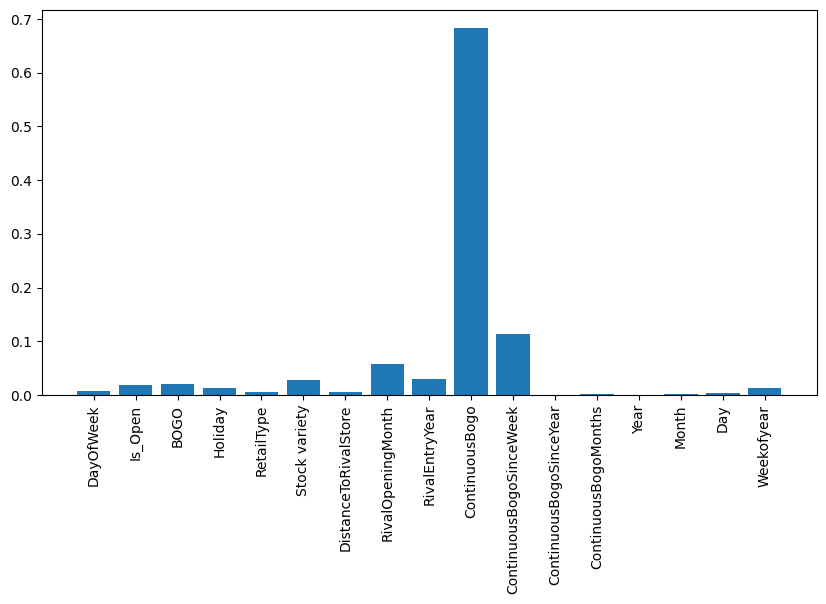

In [26]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(X.columns , feature_importances )
plt.xticks(rotation = 90)
plt.show()